In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../")
from src.preprocess import clean_data, encode_features, select_features
from src.model import train_and_save_model

In [2]:
df = pd.read_csv(r"F:\BTL_CODE\BTL_BIGDATA\data\Data_salary.csv")

In [3]:
desc = df.describe()
median = df.median(numeric_only=True)
desc.loc['median'] = median
mode = df.mode(numeric_only=True).iloc[0]
desc.loc['mode'] = mode
print(desc)

           work_year        salary  salary_in_usd  remote_ratio
count   16534.000000  1.653400e+04   16534.000000  16534.000000
mean     2023.226866  1.637270e+05  149686.777973     32.003750
std         0.713558  3.402057e+05   68505.293156     46.245158
min      2020.000000  1.400000e+04   15000.000000      0.000000
25%      2023.000000  1.017630e+05  101125.000000      0.000000
50%      2023.000000  1.422000e+05  141300.000000      0.000000
75%      2024.000000  1.872000e+05  185900.000000    100.000000
max      2024.000000  3.040000e+07  800000.000000    100.000000
median   2023.000000  1.422000e+05  141300.000000      0.000000
mode     2023.000000  1.500000e+05  150000.000000      0.000000


In [4]:
df.info()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
5,2024,SE,FT,Machine Learning Engineer,160000,USD,160000,US,0,US,M
6,2024,MI,FT,ML Engineer,400000,USD,400000,US,0,US,M
7,2024,MI,FT,ML Engineer,65000,USD,65000,US,0,US,M
8,2024,EN,FT,Data Analyst,101520,USD,101520,US,0,US,M
9,2024,EN,FT,Data Analyst,45864,USD,45864,US,0,US,M


In [5]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
# Tiền xử lý
df_cleaned = clean_data(df)

# Mã hóa categorical
x_encoded, encoder = encode_features(df_cleaned, fit_encoder=True)

# Ghép lại để có dataframe cuối cùng (có cột salary)
df_encoded = pd.concat([x_encoded, df_cleaned['salary_in_usd']], axis=1)

# Tách X, y
X, y = select_features(df_encoded)


RMSE: 56056.63
R2 Score: 0.3294


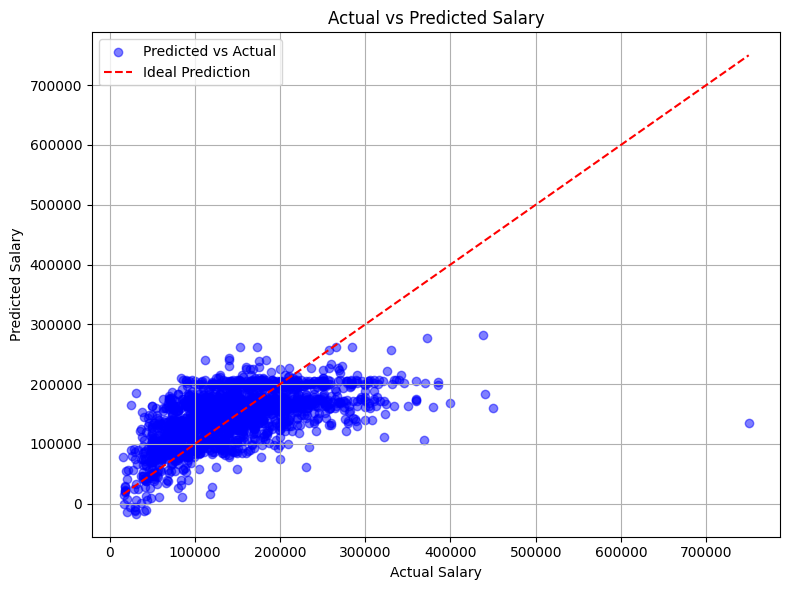

Model and encoder saved successfully.


In [7]:
# Xây dựng mô hình hồi quy tuyến tính
train_and_save_model(X, y, encoder)